# 1.Load our dependences

In [1]:
import os
import matplotlib.pyplot as plt # Ploting
import tensorflow_io as tfio # For processing Audio files
import tensorflow as tf # For Creating our model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2.Build Data Loading Function

## 2.1 Define Paths to Files

In [2]:
capuchin = os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', '/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips',"/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC3776-3.wav")
not_capuchin = os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', '/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips',"/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav" )

In [3]:
# Test 1
print(capuchin)
print(not_capuchin)

/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC3776-3.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav


# 2.2 Build Dataloading Function

## 1.Loading the file
- file_content = tf.io.read_file(filename):reads the entire audio file into a byte string tensor

## 2.Decoding the WAV
- wav, sample_rate = tf.audio.decode_wav(file_content, desired_channels=1):decodes the WAV file format and returns two tensors:

- wav: A tensor containing the audio samples as numerical values.

- sample_rate: An integer tensor containing the original sampling rate of the audio (e.g., 44,100 Hz)

## 3.Eliminating the unused channel:

 - wav = tf.squeeze(wav, axis=-1): Since we only want the mono audio signal, we use tf.squeeze to remove   the unnecessary second channel axis (-1)
 
## 4.Converting sample rate to 16kHz

- sample_rate = tf.cast(sample_rate, dtype=tf.int64): ensures the sample rate is an integer for the next step

- wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000):resamples the audio     signal from its original rate (e.g., 44,100 Hz) to 16,000 Hz. This reduces the data size while   maintaining the essential audio information

## 5. Returning the processed audio

- return wav: Finally, the processed audio signal is returned as a tensor. It now has a single channel  and a sampling rate of 16kHz, suitable for further processing in TensorFlow workflow

In [4]:
# load_wav_16k_mono : This function takes a filename as input and processes it to return a single-channel audio signal sampled at 16kHz
def load_wav_16k_mono(filename):
    # Load encoded wav file return a tensor containing the file's entire content as a byte string
    file_content = tf.io.read_file(filename)
    # Decode wav (Tensors by channels that get the mono version than the sterio version) easier to process out audio
    wav, sample_rate = tf.audio.decode_wav(file_content, desired_channels=1)
    # Remove trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000Hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav    

In [8]:
# Test 2
file_content = tf.io.read_file(capuchin)
file_content

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF\xbc\t\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data\x98\t\x04\x00\xc5\xf1(\xfb\x7f\x07F\x13|\x1c\xa3$\x07.R8\x03A\xbaF\xb6J\xb4NQR\x92S\x95Q\xa1M/I\xb3CJ;\x88/\xa2"X\x17\x12\x0e\xce\x04\xdd\xf9\x07\xeei\xe3\xc3\xda\xa5\xd2\xae\xc9\xc4\xc0P\xbaB\xb7\xb5\xb5-\xb3\xaa\xaf\xad\xad\x00\xafd\xb22\xb5\xeb\xb6\xf5\xb9m\xc0\x1e\xc9\xc6\xd0-\xd6\xba\xdbO\xe4[\xefG\xf9\xd2\xff\xc3\x04\x87\x0b\xec\x14m\x1e\xc6%\xc4+\xb22\xa3:\xd7@\x17C\x86B8BoC[D\xc5B\xda>\x9e:\x117\xeb2`,_#\x93\x19\x82\x10X\x08M\x00\xb2\xf7j\xee\t\xe5\xc1\xdc\xbc\xd6\xf3\xd2\xeb\xcfV\xcc\x1c\xc9\xc5\xc8b\xcc\x95\xd1\xe6\xd4\xe4\xd5\xda\xd7\xb2\xdd\x13\xe6\xf3\xec\xc8\xf0\x99\xf4\x00\xfc@\x06\xed\x0eX\x13\x94\x154\x19:\x1e!!\xcb\x1fj\x1cu\x1a\xdd\x19A\x17\xd6\x100\t\t\x04f\x01\xd3\xfd_\xf7\x84\xf0\xf7\xec\xb5\xec\x16\xec\xc1\xe8\xd8\xe4.\xe4V\xe72\xeb<\xed\xad\xeeb\xf2\xc1\xf8E\xff\x00\x04\x04\x08t\r!\x14\x83\x19\xfe\x1b\xd6\x1cJ\x1e\x

In [9]:
# Test 3
# Here we got the representaion of the amplitude of the wav 
wav, sample_rate = tf.audio.decode_wav(file_content, desired_channels=1)
wav

<tf.Tensor: shape=(132300, 1), dtype=float32, numpy=
array([[-0.11117554],
       [-0.0378418 ],
       [ 0.05856323],
       ...,
       [-0.01077271],
       [-0.03436279],
       [-0.04879761]], dtype=float32)>

In [10]:
# Test 4
"""
shows the value of the original sampling rate of the audio file before resampling.
It confirms that the file was initially recorded at 44,100 Hz, the standard CD quality sampling rate
"""
sample_rate


<tf.Tensor: shape=(), dtype=int32, numpy=44100>

In [11]:
# Testing 5
print(len(wav))
wav = tfio.audio.resample(wav, rate_in=44100, rate_out=16000)
wav

132300


<tf.Tensor: shape=(48000, 1), dtype=float32, numpy=
array([[ 8.9910554e-07],
       [-2.7947258e-06],
       [ 7.0741157e-06],
       ...,
       [-1.0823049e-02],
       [-3.5766482e-03],
       [ 1.5143131e-02]], dtype=float32)>

## 2.3 Plot Wave

In [12]:
pwave = load_wav_16k_mono(capuchin)
nwave = load_wav_16k_mono(not_capuchin)

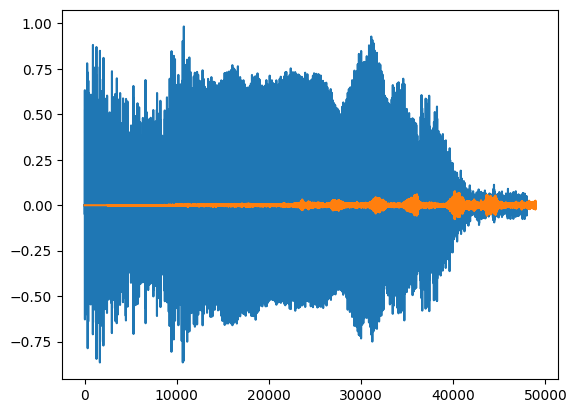

In [13]:
# The blue wave represent the bird
plt.plot(pwave)
# the orange wave represent not the bird
plt.plot(nwave)
# ploting them
plt.show()

# 3. Create Tensorflow Dataset

## 3.1 Define Paths to Positive and Negative Data

In [15]:
positive = os.path.join("/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing","/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips")
negative = os.path.join("/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing", "/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips")

In [16]:
# Test 6
print(positive)
print(negative)

/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips


# 3.2 Create TensorFlow Datasets

In [17]:
# list_files: give a set of files as string inside tensorflow dataset format
# looking for the files in specific format (wav)
pos = tf.data.Dataset.list_files(positive+'/*.wav')
neg = tf.data.Dataset.list_files(negative+'/*.wav')
# tf.data.Dataset.list_files: returns a TensorFlow Dataset object containing a tensor for each matching file path.
# The tensor element is typically a string representing the full path of the file

In [19]:
# Test 7
print(pos.as_numpy_iterator().next())
print(neg.as_numpy_iterator().next())

b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC114131-4.wav'
b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/flock-of-pigeons-cooing-sound-effect-1.wav'


## 3.3 Add labels to samples

In [20]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
# we compine all of them in a one variable
data = positives.concatenate(negatives)

In [21]:
# Test 8
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [22]:
tf.zeros(len(neg))

<tf.Tensor: shape=(593,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [23]:
# Test 9
positives.as_numpy_iterator().next()
# As we see this positive example with a 1 labeld 

(b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC433953-1.wav',
 1.0)

In [24]:
# Test 10
negatives.as_numpy_iterator().next()
# As we see this negative example with a 0 labeld 

(b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/curlew-sound-2.wav',
 0.0)

In [25]:
data.shuffle(10000).as_numpy_iterator().next()

(b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/night-insect-sounds-16.wav',
 0.0)

In [30]:
data.shuffle(10000).as_numpy_iterator().next()

(b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC227469-3.wav',
 1.0)

# 4.Detertmine Average Length of a bird

## 4.1 Calculate Wave Length

In [31]:
lengths = []

for file in os.listdir(os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', '/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', "/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips", file))
    lengths.append(len(tensor_wave))

In [32]:
# Test 10
os.listdir(os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', '/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips'))

['XC27882-2.wav',
 'XC227469-2.wav',
 'XC456236-3.wav',
 'XC227471-6.wav',
 'XC227468-3.wav',
 'XC513083-1.wav',
 'XC216012-12.wav',
 'XC9892-0.wav',
 'XC27882-0.wav',
 'XC227469-3.wav',
 'XC433953-10.wav',
 'XC79965-10.wav',
 'XC526106-4.wav',
 'XC46241-4.wav',
 'XC600460-0.wav',
 'XC201990-4.wav',
 'XC388470-5.wav',
 'XC114132-4.wav',
 'XC227471-3.wav',
 'XC9221-0.wav',
 'XC433953-8.wav',
 'XC46241-1.wav',
 'XC178168-4.wav',
 'XC216012-19.wav',
 'XC395129-4.wav',
 'XC227468-2.wav',
 'XC46241-2.wav',
 'XC216012-3.wav',
 'XC216010-7.wav',
 'XC216012-8.wav',
 'XC65196-2.wav',
 'XC3776-4.wav',
 'XC3776-2.wav',
 'XC526106-0.wav',
 'XC456236-0.wav',
 'XC3776-3.wav',
 'XC114132-5.wav',
 'XC27882-5.wav',
 'XC178168-2.wav',
 'XC79965-2.wav',
 'XC307385-0.wav',
 'XC600460-1.wav',
 'XC9221-1.wav',
 'XC433953-9.wav',
 'XC16804-0.wav',
 'XC178167-1.wav',
 'XC388470-6.wav',
 'XC456236-1.wav',
 'XC22397-1.wav',
 'XC216012-0.wav',
 'XC216010-1.wav',
 'XC227468-5.wav',
 'XC216012-4.wav',
 'XC433953-2

In [33]:
lengths

[64000,
 48000,
 48000,
 56000,
 56000,
 64000,
 48000,
 56000,
 64000,
 56000,
 55999,
 72000,
 48000,
 56000,
 56000,
 40000,
 40000,
 56000,
 56000,
 64000,
 32000,
 56000,
 64000,
 40000,
 48000,
 64000,
 56000,
 40000,
 64000,
 48000,
 56000,
 64000,
 56000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 72000,
 48000,
 48000,
 64000,
 39999,
 64000,
 56000,
 64000,
 56000,
 40000,
 64000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 56000,
 72000,
 40000,
 48000,
 40000,
 48000,
 64000,
 48000,
 64000,
 56000,
 48000,
 64000,
 48000,
 64000,
 56000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 40000,
 48000,
 64000,
 56000,
 40000,
 56000,
 32000,
 56000,
 48000,
 64000,
 64000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 64000,
 56000,
 48000,
 48000,
 64000,
 40000,
 56000,
 48000,
 56000,
 56000,
 48000,
 56000,
 48000,
 72000,
 56000,
 56000,
 48000,
 40000,
 48000,
 64000,
 56000,
 64000,
 48000,
 56000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 56000,


# 4.2 Calculate Mean, Min, Max

In [34]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [36]:
54156 / 16000

3.38475

In [35]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [37]:
32000 / 16000

2.0

In [38]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [39]:
80000 / 16000

5.0

# 5. Build Preprocessing Function to Convert to Spectogram

## 5.1 Build Preprocessing Function

function takes a file path and its corresponding label (presumably indicating positive or negative samples) and preprocesses the audio data for use in your TensorFlow workflow

### 1.Loading and processing audio
- wav = load_wav_16k_mono(file_path): calls the        previously defined load_wav_16k_mono function, which retrieves the audio data from the file, converts it to a single-channel signal at 16kHz, and returns it as a tensor

### 2.Trimming and padding
- wav = wav[:48000] : trims the audio signal to its  first 48,000 samples. This ensures all processed data has the  same length, potentially required for downstream operations

- zero_padding = tf.zeros([48000] - tf.shape(wav),dtype=float32): creates a tensor of zeros with the difference between 48,000 samples and the actual length of the trimmed audio (wav)

- wav = tf.concat([zero_padding, wav],0): Concatenates the zero padding with the trimmed audio signal, resulting in a tensor with a fixed length of 48,000 samples


### 3.Generating Spectrogram

- spectogram = tf.signal.stft(wav, frame_length=320, frame_step=32): applies the Short-Time Fourier Transform to the padded audio signal.parameters define the window size (320 samples) and the overlap between successive windows (32 samples). The result is a spectrogram containing time-frequency representations of the audio

- spectogram = tf.abs(spectogram): Takes the absolute value of the complex-valued spectrogram to obtain the magnitude spectrum, focusing on the energy distribution of the frequencies

### 4.Adding channel dimension

- spectogram = tf.expand_dims(spectogram, axis=2): Adds a new dimension of size 1 at the specified axis (2), resulting in a tensor with three dimensions: time, frequency, and channels. This format is typically expected by many machine learning models for audio classification tasks (to use it with conveloution)

### 5.Returning processed data and label

- return spectogram, label: The function returns both the preprocessed spectrogram and the original label for each audio file

In [40]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav),dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectogram = tf.abs(spectogram)
    spectogram = tf.expand_dims(spectogram, axis=2)
    return spectogram, label

In [41]:
# Test 11
wav = load_wav_16k_mono(capuchin)
wav = wav[:48000]
zero_padding = tf.zeros([48000] - tf.shape(wav),dtype=tf.float32)
wav = tf.concat([zero_padding, wav],0)
wav

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 8.9910554e-07, -2.7947258e-06,  7.0741157e-06, ...,
       -1.0823049e-02, -3.5766482e-03,  1.5143131e-02], dtype=float32)>

In [42]:
# Test 12
spectogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
spectogram = tf.abs(spectogram)
spectogram

<tf.Tensor: shape=(1491, 257), dtype=float32, numpy=
array([[7.25913644e-02, 7.10330531e-02, 6.97736368e-02, ...,
        4.76465182e-04, 2.46995420e-04, 7.33137131e-06],
       [3.56648862e-03, 9.92665999e-04, 5.69074415e-03, ...,
        3.89362685e-04, 1.96771347e-04, 3.31550837e-05],
       [3.76079977e-03, 2.74862791e-03, 3.54933785e-03, ...,
        3.23321641e-04, 2.26509219e-04, 4.48077917e-05],
       ...,
       [5.86301833e-03, 8.90618097e-03, 1.50155481e-02, ...,
        7.96053617e-04, 3.32766504e-04, 1.28917396e-04],
       [3.70551646e-03, 6.76805852e-03, 1.34907337e-02, ...,
        7.47070473e-04, 4.19661519e-04, 2.72586942e-04],
       [6.53017312e-04, 3.54314479e-03, 1.09438235e-02, ...,
        8.12167244e-04, 4.35892434e-04, 1.96952373e-04]], dtype=float32)>

In [43]:
# Test 13
spectogram = tf.expand_dims(spectogram, axis=2)


In [44]:
spectogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[7.25913644e-02],
        [7.10330531e-02],
        [6.97736368e-02],
        ...,
        [4.76465182e-04],
        [2.46995420e-04],
        [7.33137131e-06]],

       [[3.56648862e-03],
        [9.92665999e-04],
        [5.69074415e-03],
        ...,
        [3.89362685e-04],
        [1.96771347e-04],
        [3.31550837e-05]],

       [[3.76079977e-03],
        [2.74862791e-03],
        [3.54933785e-03],
        ...,
        [3.23321641e-04],
        [2.26509219e-04],
        [4.48077917e-05]],

       ...,

       [[5.86301833e-03],
        [8.90618097e-03],
        [1.50155481e-02],
        ...,
        [7.96053617e-04],
        [3.32766504e-04],
        [1.28917396e-04]],

       [[3.70551646e-03],
        [6.76805852e-03],
        [1.34907337e-02],
        ...,
        [7.47070473e-04],
        [4.19661519e-04],
        [2.72586942e-04]],

       [[6.53017312e-04],
        [3.54314479e-03],
        [1.09438235e-02]

## 5.2 Test the Function and Visualize the spectogram

In [45]:
file_path, label = positives.shuffle(buffer_size=1000).as_numpy_iterator().next()

In [46]:
spectogram, label = preprocess(file_path, label)

In [47]:
spectogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[5.4492727e-03],
        [1.8879212e-02],
        [2.1484058e-02],
        ...,
        [2.9011748e-05],
        [8.0010968e-06],
        [9.7528100e-06]],

       [[7.1054026e-03],
        [1.6939256e-02],
        [2.3152310e-02],
        ...,
        [3.5366596e-05],
        [2.0127181e-05],
        [3.9339066e-06]],

       [[1.4103588e-02],
        [1.7662354e-02],
        [2.3587078e-02],
        ...,
        [3.0746181e-05],
        [1.6620608e-05],
        [5.3718686e-06]],

       ...,

       [[1.1666298e-02],
        [2.0134799e-02],
        [3.4534462e-02],
        ...,
        [7.7651448e-06],
        [6.3312473e-06],
        [2.9453076e-06]],

       [[4.1681472e-03],
        [1.8466007e-02],
        [3.5850544e-02],
        ...,
        [5.6556551e-06],
        [5.6297840e-06],
        [9.8496675e-06]],

       [[4.5629237e-03],
        [1.7027445e-02],
        [3.2114554e-02],
        ...,
        [5.6144831

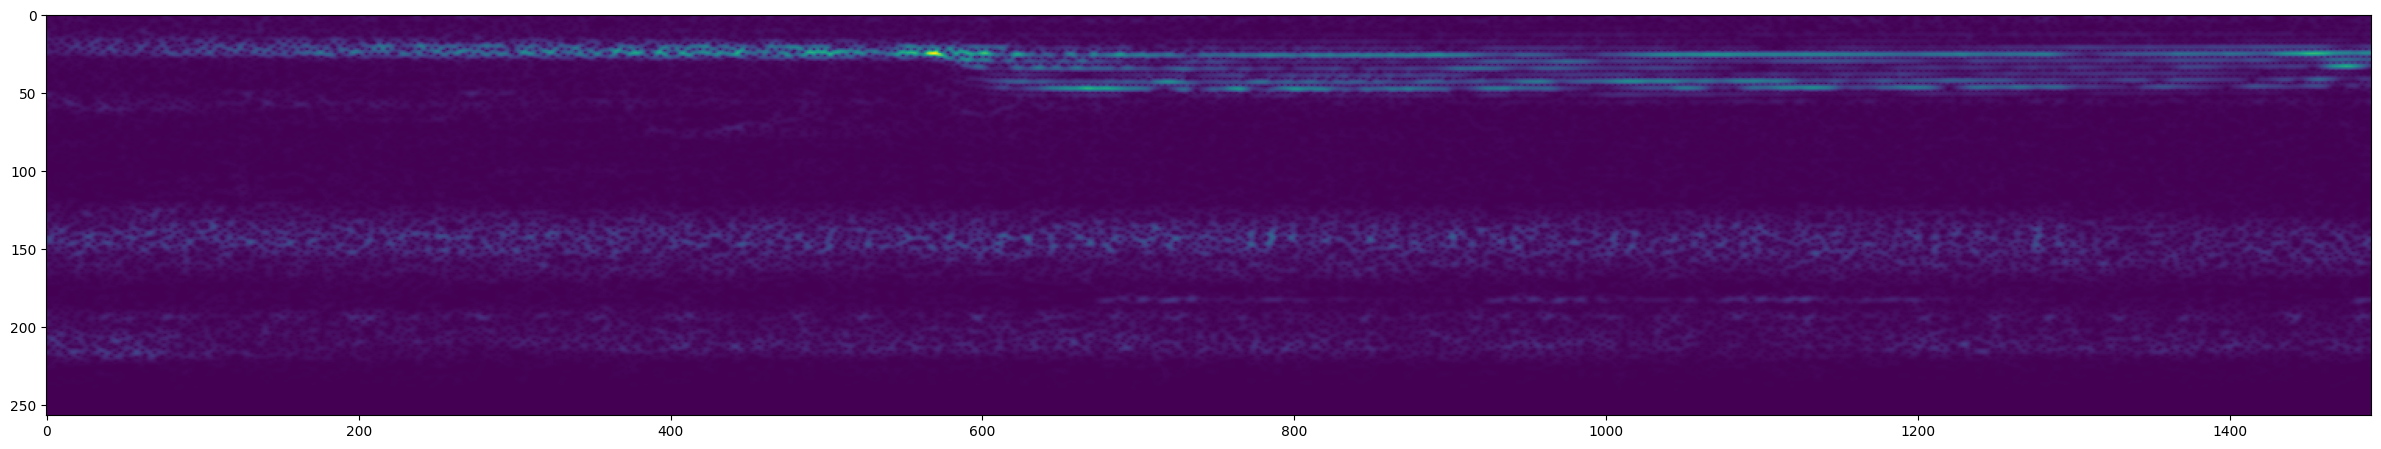

In [48]:
plt.figure(figsize=(30, 20))
plt.imshow(tf.transpose(spectogram)[0])
plt.show()

In [49]:
file_path, label = negatives.shuffle(buffer_size=1000).as_numpy_iterator().next()

In [50]:
spectogram, label = preprocess(file_path, label)

In [51]:
spectogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[1.9692135e-01],
        [9.5577173e-02],
        [1.0502092e-01],
        ...,
        [8.5806103e-05],
        [6.7710062e-05],
        [3.5241246e-06]],

       [[2.6367059e-01],
        [1.8360075e-01],
        [1.8828660e-01],
        ...,
        [3.5073605e-05],
        [9.3677387e-05],
        [5.4180622e-05]],

       [[3.5482603e-01],
        [3.2716423e-01],
        [3.0600059e-01],
        ...,
        [9.6699951e-05],
        [8.8194014e-05],
        [8.3148479e-05]],

       ...,

       [[3.6429989e-01],
        [2.6731092e-01],
        [1.0356502e-01],
        ...,
        [1.1750363e-04],
        [1.0133212e-05],
        [5.4851174e-05]],

       [[3.8619572e-01],
        [3.1609404e-01],
        [1.8434446e-01],
        ...,
        [1.0326195e-04],
        [4.5781499e-06],
        [4.0039420e-05]],

       [[3.8058534e-01],
        [3.3881032e-01],
        [2.3729943e-01],
        ...,
        [1.0400205

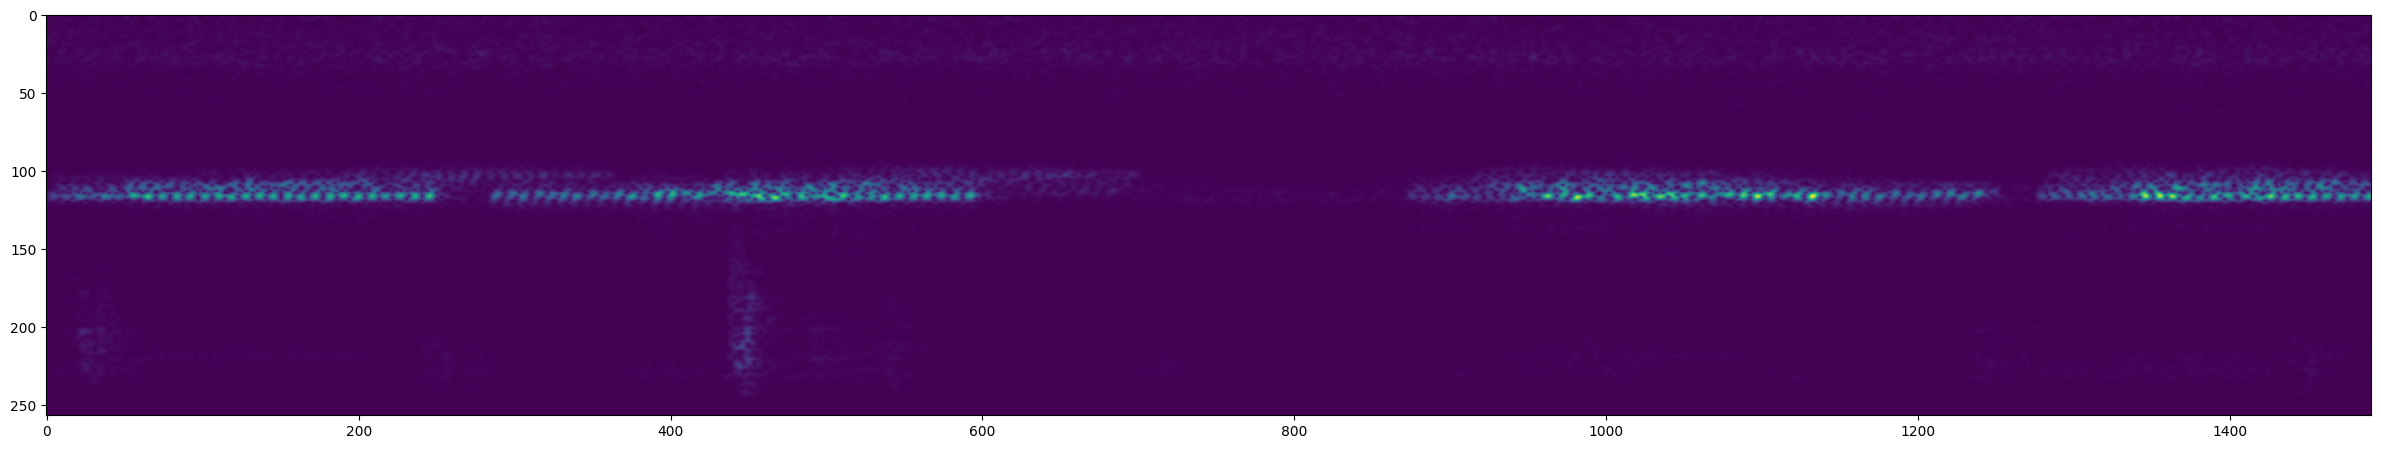

In [52]:
plt.figure(figsize=(30, 20))
plt.imshow(tf.transpose(spectogram)[0])
plt.show()

# 6.Create Training and Testing Partitions

## 6.1Create a TesnsorFlow Data Pipeline

In [53]:
data.as_numpy_iterator().next()

(b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC44070-0.wav',
 1.0)

In [67]:
# mcsbp
# the data pipline of TesnorFlow dataset
data = data.map(preprocess) # use map functoin to apply the preprocess function to the data
data = data.cache() # cache it
data = data.shuffle(buffer_size=10000) # shuffling the data to not biases 
data = data.batch(16) # the number of histograme process in time
data = data.prefetch(8) # for cpu computation

## 6.2 Split into Training and Testing Partitions

In [68]:
len(data) * 0.7

35.699999999999996

In [69]:
train = data.take(36)
test = data.skip(36).take(15)

## 6.3 Test one batch

In [70]:
samples, labels = train.as_numpy_iterator().next()

In [71]:
labels

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
      dtype=float32)

In [72]:
samples

array([[[[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        ...,

        [[1.51116401e-04],
         [2.42162452e-04],
         [4.06435924e-04],
         ...,
         [1.57913655e-06],
         [8.22903075e-07],
         [1.04820356e-06]],

        [[1.67625491e-04],
         [1.95608591e-04],
         [3.39246297e-04],
         ...,
         [2.30690557e-06],
         [1.15821263e-06],
         [1.24331564e-07]],

        [[2.63729598e-05],
         [1.87612590e-04],
         [2.21232243e-04],
         ...,
 

In [73]:
samples.shape

(16, 1491, 257, 1)

# 7.Build Deep Learning Model

## 7.1 Load TensorFlow Dependencies

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

## 7.2 Build Sequential Model Compile and View Summary

In [75]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(1491, 257, 1)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [76]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1489, 255, 16)     160       
                                                                 
 conv2d_1 (Conv2D)           (None, 1487, 253, 16)     2320      
                                                                 
 flatten (Flatten)           (None, 6019376)           0         
                                                                 
 dense (Dense)               (None, 128)               770480256 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 770482865 (2.87 GB)
Trainable params: 770482865 (2.87 GB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 7.3 Fit Model, View Loss and Plots

In [78]:
hist = model.fit(train, epochs=25, validation_data=test)

Epoch 1/25
36/36 [==============================] - 28s 302ms/step - loss: 6.6064 - recall: 0.9610 - precision: 0.7749 - val_loss: 0.2954 - val_recall: 0.9855 - val_precision: 0.9855
Epoch 2/25
36/36 [==============================] - 10s 279ms/step - loss: 0.3847 - recall: 0.9615 - precision: 0.9494 - val_loss: 0.0335 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 3/25
36/36 [==============================] - 10s 277ms/step - loss: 0.0727 - recall: 0.9939 - precision: 0.9759 - val_loss: 0.0562 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 4/25
36/36 [==============================] - 10s 275ms/step - loss: 0.0332 - recall: 0.9934 - precision: 1.0000 - val_loss: 0.0315 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 5/25
36/36 [==============================] - 10s 273ms/step - loss: 0.0307 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0306 - val_recall: 1.0000 - val_precision: 1.0000
Epoch 6/25
36/36 [==============================] - 10s 272ms/step - loss: 0.0259 - r

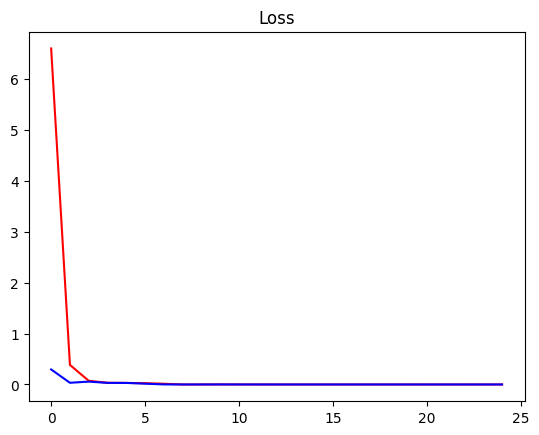

In [79]:
plt.title("Loss")
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

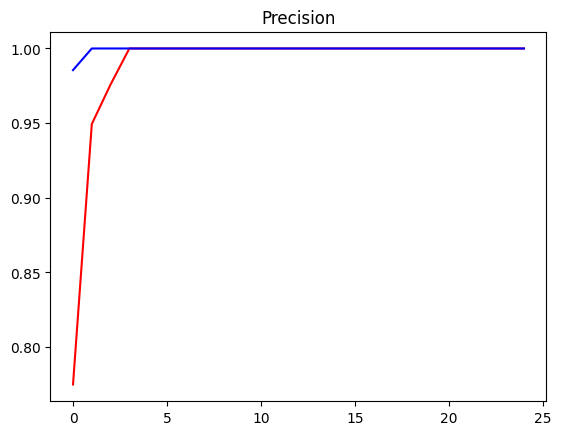

In [80]:
plt.title("Precision")
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

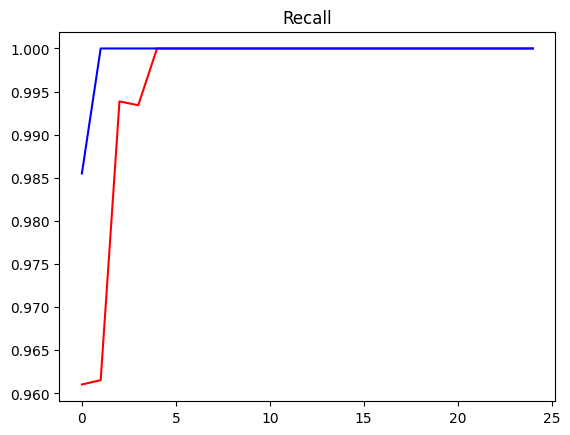

In [81]:
plt.title("Recall")
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

# 8.Make a Prediction on a Single Clip

## 8.1 Get One Batch and Make a Prediction

In [82]:
X_test, y_test = test.as_numpy_iterator().next()
# X_test : spectogram
# y_test : labels

In [83]:
X_test.shape

(16, 1491, 257, 1)

In [84]:
y_hat = model.predict(X_test)

1/1 [==============================] - 0s 113ms/step


In [85]:
y_hat

array([[0.0000000e+00],
       [1.2908093e-20],
       [1.0000000e+00],
       [2.8222317e-17],
       [5.4486239e-13],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [3.7412144e-34],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00]], dtype=float32)

## 8.2 Convert Logits to classes

In [86]:
y_hat = [1 if prediction > 0.5 else 0 for prediction in y_hat]

In [87]:
y_hat

[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]

In [88]:
y_test.astype(int)

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [89]:
# Testing 12
tf.math.reduce_sum(y_hat)


<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [90]:
tf.math.reduce_sum(y_test)
# model classify all the calls correctly 🥹

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [91]:
# Testing another one
X_test, y_test = test.as_numpy_iterator().next()

In [92]:
y_hat = model.predict(X_test)

1/1 [==============================] - 0s 33ms/step


In [93]:
y_hat = [1 if prediction > 0.5 else 0 for prediction in y_hat]

In [94]:
y_hat

[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]

In [95]:
y_test.astype(int)
# model classify all the calls correctly again 🥹

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

# 9.Build Forest Parsing Functions

## 9.1 Load up MP3s

In [96]:
def load_mp3_16k_mono(filename):
    """ Load a mp3 file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [97]:
mp3 = os.path.join("/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing", "/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings", "/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings/recording_00.mp3")

In [98]:
mp3

'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings/recording_00.mp3'

In [99]:
# Test 13
wav = load_mp3_16k_mono(mp3)

In [100]:
wav

<tf.Tensor: shape=(2880666,), dtype=float32, numpy=
array([ 8.1433272e-12, -5.7019250e-12, -5.3486417e-12, ...,
       -1.1291276e-02, -1.4230422e-02, -3.0555837e-03], dtype=float32)>

In [101]:
# devide the full clip into slices and make prediction on every 3s of it
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [102]:
samples, index = audio_slices.as_numpy_iterator().next()

In [103]:
# we take full clip and convert it to 60 windows then we take those windows and convert them into spectograms
len(audio_slices)

60

In [104]:
samples.shape

(1, 48000)

## 9.2 Build Function to Convert Clips into Windowed Spectograms

In [106]:
# The same function as above
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

## 9.3 Convert Longer Clips into Windows and Make Predictions

In [107]:
# Test 14
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [108]:
y_hat = model.predict(audio_slices)
y_hat = [1 if predictions > 0.99 else 0 for predictions in y_hat]

1/1 [==============================] - 3s 3s/step


In [109]:
y_hat

[0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [110]:
len(y_hat)

60

## 9.4 Group Consecutive Detections

In [111]:
from itertools import groupby

In [112]:
y_hat = [key for key ,group in groupby(y_hat)]

In [113]:
y_hat

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [114]:
# Test 15
tf.math.reduce_sum(y_hat)

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [115]:
calls = tf.math.reduce_sum(y_hat).numpy()

In [116]:
calls

7

# 10.Make Predictions

## 10.1 Loop over all recordings and make predictions

In [117]:
results = {}
for file in os.listdir(os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing', '/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings')):
    FILEPATH = os.path.join('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing','/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

1/1 [==============================] - 1s 632ms/step


## 10.2 Convert Predictions into classes

In [118]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
    
 
class_preds

{'recording_76.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_62.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_48.mp3': [0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_44.mp3': [0,
  0,
  0,
  

In [119]:
post_processed = {}
for file, scores in class_preds.items():
    post_processed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)])

post_processed

{'recording_76.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'recording_62.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'recording_48.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 'recording_44.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 'recording_45.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=4>,
 'recording_06.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=9>,
 'recording_43.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 'recording_68.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 'recording_95.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 'recording_17.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 'recording_65.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 'recording_74.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'recording_10.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=5>,
 'recording_49.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=0>,
 'recording_15.mp3': <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 'recordin

# 11. Export Results

In [120]:
import csv

In [121]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in post_processed.items():
        writer.writerow([key, value])